# Title: Amazon Product Review Analysis on Prime Pantry Dataset
* Scenario: Customer retention & Sentiment Forecasting

## Machine Learning Models

In [1]:
# File Reading
import zipfile

# Array
import numpy as np
from numpy import mean,std

#DataFrame
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier

# Model Building
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold,train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

#Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score
from sklearn.pipeline import Pipeline

# Time
from time import time

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
file=files.upload()

Saving clean_data_finall.zip to clean_data_finall.zip


In [3]:
## Reading the preprocessed data
####################################
pantry_bkp=pd.read_csv('clean_data_finall.zip',compression='zip')
#pantry_bkp.drop('Unnamed: 0',axis=1,inplace=True)
pantry_bkp.head() 

,rating,verified,Date,reviewerID,asin,reviewerName,unixReviewTime,description,title,also_buy,brand,feature,rank,also_view,price,review_text,clean_text,Polarity,Analysis
0,4,True,2015-09-24,A31Y9ELLA1JUB0,B0000DIWNI,Her Royal Peepness Princess HoneyBunny Blayze,1443052800,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,Pretty Good For plastic Wrap I purchased this ...,pretty good plastic wrap purchase saran premiu...,0.187037,Neutral
1,5,True,2015-06-23,A2FYW9VZ0AMXKY,B0000DIWNI,Mary,1435017600,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,"The Best Plastic Wrap for your Cooking, Baking...",best plastic wrap cook bake food storage need ...,0.317857,Neutral
2,5,True,2015-06-13,A1NE43T0OM6NNX,B0000DIWNI,Tulay C,1434153600,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,"Good and strong. Good wrap, keeping it in the ...",good strong good wrap keep fridge make easier ...,0.611111,Positive
3,4,True,2015-06-03,AHTCPGK2CNPKU,B0000DIWNI,OmaShops,1433289600,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,Doesn't cling as well to dishes as other brand...,doesn t cling dish brand tangle prefer saran w...,0.000000,Negative
4,5,True,2015-04-20,A25SIBTMVXLB59,B0000DIWNI,Nitemanslim,1429488000,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,Five Stars Thanks,star thank,0.000000,Negative


In [4]:
pantry_bkp.dropna(inplace=True)

In [5]:
pantry_bkp.head()

,rating,verified,Date,reviewerID,asin,reviewerName,unixReviewTime,description,title,also_buy,brand,feature,rank,also_view,price,review_text,clean_text,Polarity,Analysis
0,4,True,2015-09-24,A31Y9ELLA1JUB0,B0000DIWNI,Her Royal Peepness Princess HoneyBunny Blayze,1443052800,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,Pretty Good For plastic Wrap I purchased this ...,pretty good plastic wrap purchase saran premiu...,0.187037,Neutral
1,5,True,2015-06-23,A2FYW9VZ0AMXKY,B0000DIWNI,Mary,1435017600,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,"The Best Plastic Wrap for your Cooking, Baking...",best plastic wrap cook bake food storage need ...,0.317857,Neutral
2,5,True,2015-06-13,A1NE43T0OM6NNX,B0000DIWNI,Tulay C,1434153600,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,"Good and strong. Good wrap, keeping it in the ...",good strong good wrap keep fridge make easier ...,0.611111,Positive
3,4,True,2015-06-03,AHTCPGK2CNPKU,B0000DIWNI,OmaShops,1433289600,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,Doesn't cling as well to dishes as other brand...,doesn t cling dish brand tangle prefer saran w...,0.000000,Negative
4,5,True,2015-04-20,A25SIBTMVXLB59,B0000DIWNI,Nitemanslim,1429488000,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,Five Stars Thanks,star thank,0.000000,Negative


In [6]:
# Checking the null values
pantry_bkp.isnull().sum()

rating            0
verified          0
Date              0
reviewerID        0
asin              0
reviewerName      0
unixReviewTime    0
description       0
title             0
also_buy          0
brand             0
feature           0
rank              0
also_view         0
price             0
review_text       0
clean_text        0
Polarity          0
Analysis          0
dtype: int64

In [7]:
# Determining Target column and non-targeted column and splitting them for training & testing
#################################################################################################
x=pantry_bkp['clean_text']
y=pantry_bkp['Analysis']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

# Model Building

* Logistic Regression

In [8]:
# Self defining function to convert the data into vector form by bow model and classify and create model Logistic Regression

def model_ovr_lr_bow(x_train, x_test, y_train, y_test):
    global acc_lr_bow,f1_lr_bow
    # Text to vector transformation 
    vector = CountVectorizer(min_df=1, ngram_range=(1,1))
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    
    #Classifing data of the four classes using a one vs. rest strategy with Logistic Regression
    
    lr = LogisticRegression()
    ovr = OneVsRestClassifier(lr)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_lr_bow=accuracy_score(y_test,y_pred)
    f1_lr_bow=f1_score(y_test,y_pred,average='weighted')
    
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_lr_bow)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_lr_bow
# Self defining function to convert the data into vector form by countvectorizer and classify and create model by Logistic Regression

def model_ovr_lr_cv(x_train, x_test, y_train, y_test):
    global acc_lr_cv,f1_lr_cv
    # Text to vector transformation 
    vector = CountVectorizer(ngram_range=(1,3))
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    
    #Classifing data of the four classes using a one vs. rest strategy with Logistic Regression
    
    lr = LogisticRegression()
    ovr = OneVsRestClassifier(lr)
    
    #fitting training data into the model & predicting
    t0 = time()

    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_lr_cv=accuracy_score(y_test,y_pred)
    f1_lr_cv=f1_score(y_test,y_pred,average='weighted')
    print('Time: ',time()-t0)
    print('Accuracy: ',acc_lr_cv)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_lr_cv
# Self defining function to convert the data into vector form by tf idf vectorizer and classify and create model by Logistic regression

def model_ovr_lr_tf(x_train, x_test, y_train, y_test):
    global acc_lr_tf,f1_lr_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    
    #Classifing data of the four classes using a one vs. rest strategy with Logistic Regression
    
    lr = LogisticRegression()
    ovr = OneVsRestClassifier(lr)
    
    #fitting training data into the model & predicting
    t0 = time()

    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_lr_tf=accuracy_score(y_test,y_pred)
    f1_lr_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time :',time()-t0)
    print('Accuracy: ',acc_lr_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_lr_tf

* Multinomial Naive- Bayes

In [12]:
# Self defining function to convert the data into vector form by bow model and classify and create model Multinomial NB

def model_ovr_nb_bow(x_train, x_test, y_train, y_test):
    global acc_nb_bow,f1_nb_bow
    # Text to vector transformation 
    vector = CountVectorizer(min_df=1, ngram_range=(1,1))
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    
    #Classifing data of the three classes using a one vs. rest strategy with Multinomial NB
    
    lr = MultinomialNB()
    ovr = OneVsRestClassifier(lr)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_nb_bow=accuracy_score(y_test,y_pred)
    f1_nb_bow=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_nb_bow)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_nb_bow
# Self defining function to convert the data into vector form by countvectorizer and classify and create model by MultinomialNB

def model_ovr_nb_cv(x_train, x_test, y_train, y_test):
    global acc_nb_cv,f1_nb_cv
    # Text to vector transformation 
    vector = CountVectorizer(ngram_range=(1,3))
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    
    #Classifing data of the three classes using a one vs. rest strategy with MultinomialNB
    
    lr = MultinomialNB()
    ovr = OneVsRestClassifier(lr)
    
    #fitting training data into the model & predicting
    t0 = time()

    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_nb_cv=accuracy_score(y_test,y_pred)
    f1_nb_cv=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_nb_cv)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_nb_cv
# Self defining function to convert the data into vector form by tf idf vectorizer and classify and create model by MultinomialNB

def model_ovr_nb_tf(x_train, x_test, y_train, y_test):
    global acc_nb_tf,f1_nb_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    
    #Classifing data of the three classes using a one vs. rest strategy with MultinomialNB
    
    lr = MultinomialNB()
    ovr = OneVsRestClassifier(lr)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_nb_tf=accuracy_score(y_test,y_pred)
    f1_nb_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_nb_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_nb_tf

* Decision Tree Classifier

In [13]:
# Self defining function to convert the data into vector form by bow model and classify and create model Decision Tree Classifier

def model_ovr_dt_bow(x_train, x_test, y_train, y_test):
    global acc_dt_bow,f1_dt_bow
    # Text to vector transformation 
    vector = CountVectorizer(min_df=1, ngram_range=(1,1))
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    
    #Classifing data of the three classes using a one vs. rest strategy with Decision Tree Classifier
    
    lr = DecisionTreeClassifier()
    ovr = OneVsRestClassifier(lr)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_dt_bow=accuracy_score(y_test,y_pred)
    f1_dt_bow=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_dt_bow)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_dt_bow
# Self defining function to convert the data into vector form by countvectorizer and classify and create model by Decision Tree Classifier

def model_ovr_dt_cv(x_train, x_test, y_train, y_test):
    global acc_dt_cv,f1_dt_cv
    # Text to vector transformation 
    vector = CountVectorizer(ngram_range=(1,3))
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    
    #Classifing data of the three classes using a one vs. rest strategy with Decision Tree Classifier
    
    lr = DecisionTreeClassifier()
    ovr = OneVsRestClassifier(lr)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_dt_cv=accuracy_score(y_test,y_pred)
    f1_dt_cv=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_dt_cv)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_dt_cv
# Self defining function to convert the data into vector form by tf idf vectorizer and classify and create model by Decision Tree Classifier 

def model_ovr_dt_tf(x_train, x_test, y_train, y_test):
    global acc_dt_tf,f1_dt_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    
    #Classifing data of the three classes using a one vs. rest strategy with Decision Tree Classifier
    
    lr = DecisionTreeClassifier()
    ovr = OneVsRestClassifier(lr)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_dt_tf=accuracy_score(y_test,y_pred)
    f1_dt_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_dt_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_dt_tf

* KNN Classifier

In [14]:
# Self defining function to convert the data into vector form by bow model and classify and create model Logistic Regression

def model_ovr_knn_bow(x_train, x_test, y_train, y_test):
    global acc_knn_bow,f1_knn_bow
    # Text to vector transformation 
    vector = CountVectorizer(min_df=1, ngram_range=(1,1))
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    
    #Classifing data of the four classes using a one vs. rest strategy with Logistic Regression
    
    lr = KNeighborsClassifier()
    ovr = OneVsRestClassifier(lr)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_knn_bow=accuracy_score(y_test,y_pred)
    f1_knn_bow=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_knn_bow)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_knn_bow
# Self defining function to convert the data into vector form by countvectorizer and classify and create model by Logistic Regression

def model_ovr_knn_cv(x_train, x_test, y_train, y_test):
    global acc_knn_cv,f1_knn_cv
    # Text to vector transformation 
    vector = CountVectorizer(ngram_range=(1,3))
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    
    #Classifing data of the four classes using a one vs. rest strategy with Logistic Regression
    
    lr = KNeighborsClassifier()
    ovr = OneVsRestClassifier(lr)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_knn_cv=accuracy_score(y_test,y_pred)
    f1_knn_cv=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_knn_cv)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_knn_cv
# Self defining function to convert the data into vector form by tf idf vectorizer and classify and create model by Logistic regression

def model_ovr_knn_tf(x_train, x_test, y_train, y_test):
    global acc_knn_tf,f1_knn_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    
    #Classifing data of the four classes using a one vs. rest strategy with Logistic Regression
    
    lr = KNeighborsClassifier()
    ovr = OneVsRestClassifier(lr)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_knn_tf=accuracy_score(y_test,y_pred)
    f1_knn_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_knn_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_knn_tf

# Model Evaluation 

* Logistic Regression model Evaluation (BOW, CountVectorizer,TF-IDF)

In [9]:
print('BOW model - LR Evaluation')
print(30*'*******')
model_lr_bow=model_ovr_lr_bow(x_train,x_test,y_train,y_test)
print(10*'========')
print(' CV model - LR Evaluation')
print(30*'*******')
model_lr_cv=model_ovr_lr_cv(x_train,x_test,y_train,y_test)
print(10*'========')
print('TfIdf model - LR Evaluation')
print(30*'*******')
model_lr_tf=model_ovr_lr_tf(x_train,x_test,y_train,y_test)
print(10*'========')

BOW model - LR Evaluation
******************************************************************************************************************************************************************************************************************
Time :  9.593959093093872
Accuracy:  0.9387304820095044
Confusion Matrix: 
 [[ 7693   369     5]
 [  447 12226  1064]
 [   48   594 18798]]
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.94      0.95      0.95      8067
     Neutral       0.93      0.89      0.91     13737
    Positive       0.95      0.97      0.96     19440

    accuracy                           0.94     41244
   macro avg       0.94      0.94      0.94     41244
weighted avg       0.94      0.94      0.94     41244

 CV model - LR Evaluation
***********************************************************************************************************************************************************************************************

* Multinomial Naive-Bayes model Evaluation (BOW, CountVectorizer,TF-IDF)

In [15]:
print('BOW model - MNB Evaluation')
print(30*'*******')
model_nb_bow=model_ovr_nb_bow(x_train,x_test,y_train,y_test)
print(10*'========')
print(' CV model - MNB Evaluation')
print(30*'*******')
model_nb_cv=model_ovr_nb_cv(x_train,x_test,y_train,y_test)
print(10*'========')
print('TfIdf model - MNB Evaluation')
print(30*'*******')
model_nb_tf=model_ovr_nb_tf(x_train,x_test,y_train,y_test)
print(10*'========')

BOW model - MNB Evaluation
******************************************************************************************************************************************************************************************************************
Time :  0.9757351875305176
Accuracy:  0.7513820192027931
Confusion Matrix: 
 [[ 3136  1643  3288]
 [  333 10270  3134]
 [   66  1790 17584]]
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.89      0.39      0.54      8067
     Neutral       0.75      0.75      0.75     13737
    Positive       0.73      0.90      0.81     19440

    accuracy                           0.75     41244
   macro avg       0.79      0.68      0.70     41244
weighted avg       0.77      0.75      0.74     41244

 CV model - MNB Evaluation
********************************************************************************************************************************************************************************************

* Decision Tree model Evaluation (BOW, CountVectorizer,TF-IDF)

In [16]:
print('BOW model - DT Evaluation')
print(30*'*******')
model_dt_bow=model_ovr_dt_bow(x_train,x_test,y_train,y_test)
print(10*'========')
print(' CV model - DT Evaluation')
print(30*'*******')
model_dt_cv=model_ovr_dt_cv(x_train,x_test,y_train,y_test)
print(10*'========')
print('TfIdf model - DT Evaluation')
print(30*'*******')
model_dt_tf=model_ovr_dt_tf(x_train,x_test,y_train,y_test)
print(10*'========')

BOW model - DT Evaluation
******************************************************************************************************************************************************************************************************************
Time :  56.32885956764221
Accuracy:  0.8691203569003977
Confusion Matrix: 
 [[ 7073   773   221]
 [  121 10057  3559]
 [   15   709 18716]]
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.98      0.88      0.93      8067
     Neutral       0.87      0.73      0.80     13737
    Positive       0.83      0.96      0.89     19440

    accuracy                           0.87     41244
   macro avg       0.89      0.86      0.87     41244
weighted avg       0.87      0.87      0.87     41244

 CV model - DT Evaluation
***********************************************************************************************************************************************************************************************

* KNN model Evaluation (BOW, CountVectorizer,TF-IDF)

In [17]:
print('BOW model - KNN Evaluation')
print(30*'*******')
model_knn_bow=model_ovr_knn_bow(x_train,x_test,y_train,y_test)
print(10*'========')
print(' CV model - KNN Evaluation')
print(30*'*******')
model_knn_cv=model_ovr_knn_cv(x_train,x_test,y_train,y_test)
print(10*'========')
print('TfIdf model - KNN Evaluation')
print(30*'*******')
model_knn_tf=model_ovr_knn_tf(x_train,x_test,y_train,y_test)
print(10*'========')

BOW model - KNN Evaluation
******************************************************************************************************************************************************************************************************************
Time :  315.747451543808
Accuracy:  0.7202744641644845
Confusion Matrix: 
 [[ 7322   243   502]
 [ 2144  3916  7677]
 [  744   227 18469]]
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.72      0.91      0.80      8067
     Neutral       0.89      0.29      0.43     13737
    Positive       0.69      0.95      0.80     19440

    accuracy                           0.72     41244
   macro avg       0.77      0.71      0.68     41244
weighted avg       0.76      0.72      0.68     41244

 CV model - KNN Evaluation
**********************************************************************************************************************************************************************************************

## Model Evaluation Summary

In [18]:
# Creating a Dataframe to Summarize the Model Evaluation
###############################################################
tbl=pd.DataFrame()
tbl['Model']=pd.Series(['Logistic Regression- BOW','Logistic Regression- CV','Logistic Regression- TFIDF',
                        'Multinomial NB- BOW','Multinomial NB- CV','Multinomial NB- TFIDF',
                        'Decision Tree- BOW','Decision Tree- CV','Decision Tree- TFIDF',
                        'KNN- BOW','KNN- CV','KNN- TFIDF'])
tbl['Accuracy']=pd.Series([acc_lr_bow,acc_lr_cv,acc_lr_tf,
                           acc_nb_bow,acc_nb_cv,acc_nb_tf,
                           acc_dt_bow,acc_dt_cv,acc_dt_tf,
                           acc_knn_bow,acc_knn_cv,acc_knn_tf])
tbl['F1']=pd.Series([f1_lr_bow,f1_lr_cv,f1_lr_tf,
                     f1_nb_bow,f1_nb_cv,f1_nb_tf,
                     f1_dt_bow,f1_dt_cv,f1_dt_tf,
                     f1_knn_bow,f1_knn_cv,f1_knn_tf])
tbl.set_index('Model')

,Accuracy,F1
Model,,
Logistic Regression- BOW,0.938730,0.938424
Logistic Regression- CV,0.929226,0.928783
Logistic Regression- TFIDF,0.921322,0.921278
Multinomial NB- BOW,0.751382,0.736585
Multinomial NB- CV,0.794637,0.789675
Multinomial NB- TFIDF,0.765251,0.746678
Decision Tree- BOW,0.869120,0.866888
Decision Tree- CV,0.873097,0.871250
Decision Tree- TFIDF,0.865677,0.863494


## Model building by TFIDF vectorization method only 

In [22]:
# Label Encoding the classification data of target column
##########################################################################
l_encoder=preprocessing.LabelEncoder()
pantry_bkp['Analysis_encoded']=l_encoder.fit_transform(pantry_bkp['Analysis'])

x=pantry_bkp['clean_text']
y=pantry_bkp['Analysis_encoded']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

vector = TfidfVectorizer()

x_train_v = vector.fit_transform(x_train)
x_test_v  = vector.transform(x_test)




 OneVsRestClassifier(estimator=LogisticRegression())
f1-Score(train): mean= (0.918), min=(0.914)) ,max= (0.922), stdev= (0.003)
f1-Score(test): 0.9176

 MultinomialNB()
f1-Score(train): mean= (0.750), min=(0.742)) ,max= (0.753), stdev= (0.004)
f1-Score(test): 0.7495

 DecisionTreeClassifier()
f1-Score(train): mean= (0.880), min=(0.870)) ,max= (0.885), stdev= (0.004)
f1-Score(test): 0.8807

 KNeighborsClassifier()
f1-Score(train): mean= (0.610), min=(0.591)) ,max= (0.648), stdev= (0.019)
f1-Score(test): 0.6106


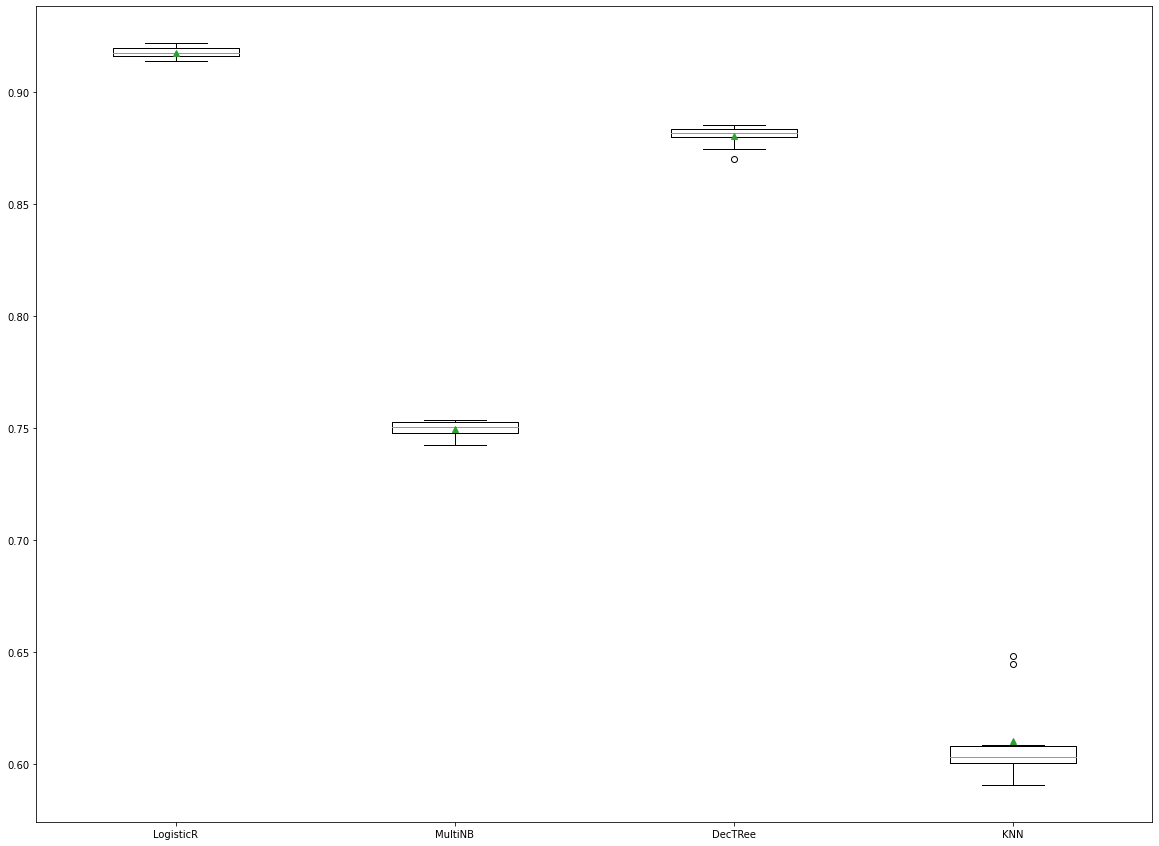

In [23]:
###############################################################################
# Model building
lr =OneVsRestClassifier(LogisticRegression())
mnb=MultinomialNB()
dct=DecisionTreeClassifier()
knn=KNeighborsClassifier()
m  =[lr,mnb,dct,knn]
model_name=['LogisticR','MultiNB','DecTRee','KNN']

results, mean_results, p, f1_test=list(),list(),list(),list()

################################################################################
#Model fitting,cross-validating and evaluating performance

def algor(model):
  print('\n',i)
  pipe=Pipeline([('model',model)])
  pipe.fit(x_train_v,y_train)
  cv=StratifiedKFold(n_splits=10)
  n_scores=cross_val_score(pipe,x_train_v,y_train,scoring='f1_weighted',cv=cv,n_jobs=-1,error_score='raise') # As it is an Imbalance data so f1 score will give a better accuracy than normal accuracy.
  results.append(n_scores)
  mean_results.append(mean(n_scores))
  print('f1-Score(train): mean= (%.3f), min=(%.3f)) ,max= (%.3f), stdev= (%.3f)'%(mean(n_scores), min(n_scores), max(n_scores),np.std(n_scores)))
  y_pred=cross_val_predict(model,x_train_v,y_train,cv=cv)
  p.append(y_pred)
  f1=f1_score(y_train,y_pred, average = 'weighted')
  f1_test.append(f1)
  print('f1-Score(test): %.4f'%(f1))

for i in m:
  algor(i)

###############################################################################
# Model comparison By Visualizing 
fig=plt.subplots(figsize=(20,15))
plt.boxplot(results,labels=model_name,showmeans=True)
plt.show()

### Hyperparameter Tuning of Logistic Regression Model By Tf-Idf vectorization.
   * As we get higher accuracy in Logistic Regression  among all the models.

In [24]:
lr = LogisticRegression()
# Penalty Type 
penalty = ['l1', 'l2'] #l2 penalty- Ridge model, l1 penalty- Lasso model, It will used to reduce the error & increasing the accuracy of model

# use logarithimically spaced c values 
c= np.logspace(0, 4, 10) #Inverse of regularization(l1,l2) strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
# Applying Grid Search CV
grid_model_lr_tf = GridSearchCV(lr, 
                         param_grid = {'C':c, 'penalty': penalty})


In [25]:
x=pantry_bkp['clean_text']
y=pantry_bkp['Analysis']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [26]:
vector = TfidfVectorizer()
x_train = vector.fit_transform(x_train)
x_test = vector.transform(x_test)
#Classifing data of the four classes using a one vs. rest strategy with Logistic Regression
    

#fitting training data into the model & predicting
    
grid_model_lr_tf.fit(x_train, y_train)
    
#y_pred = grid_model_lr_bow.predict(x_test)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [27]:
# Getting the best parameters by Grid Search CV 
############################################################
grid_model_lr_tf.best_params_

{'C': 59.94842503189409, 'penalty': 'l2'}

In [28]:
## Fine Tuned Model
###############################
x=pantry_bkp['clean_text']
y=pantry_bkp['Analysis']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
vector = TfidfVectorizer()
x_train = vector.fit_transform(x_train)
x_test = vector.transform(x_test)

log=LogisticRegression(C= 59.94842503189409, penalty= 'l2')
lr_tf_model=OneVsRestClassifier(log)
lr_tf_model.fit(x_train,y_train)
y_pred =lr_tf_model.predict(x_test)
acc_trn=lr_tf_model.score(x_train,y_train)
acc_tst=accuracy_score(y_test,y_pred)
f1     =f1_score(y_test,y_pred,average='weighted')
conf=confusion_matrix(y_test,y_pred)
print('Train Accuracy : ',acc_trn)
print('Test Accuracy  : ',acc_tst)
print('f1-Score Test  : ',f1)
print('Classification Report : \n',classification_report(y_test,y_pred))
print(10*'==============')
print('Confusion Matrix : \n',conf)

Train Accuracy :  0.9823974396275822
Test Accuracy  :  0.9512656386383473
f1-Score Test  :  0.9512871008844906
Classification Report : 
               precision    recall  f1-score   support

    Negative       0.96      0.95      0.95      8067
     Neutral       0.93      0.93      0.93     13737
    Positive       0.97      0.97      0.97     19440

    accuracy                           0.95     41244
   macro avg       0.95      0.95      0.95     41244
weighted avg       0.95      0.95      0.95     41244

Confusion Matrix : 
 [[ 7636   420    11]
 [  310 12790   637]
 [   22   610 18808]]


## Model Comparison (Before Hyperparameter Tuning & After Hyperparameter Tuning

In [29]:
tbl1=pd.DataFrame()
tbl1['Model']=pd.Series(['Logistic Regression With TFIDF( Before HP Tuning)','Logistic Regression With TFIDF( After HP Tuning)'])
tbl1['Accuracy']=pd.Series([acc_lr_tf,acc_tst])
tbl1['F1 Score']=pd.Series([f1_lr_tf,f1])
tbl1.set_index('Model')

,Accuracy,F1 Score
Model,,
Logistic Regression With TFIDF( Before HP Tuning),0.921322,0.921278
Logistic Regression With TFIDF( After HP Tuning),0.951266,0.951287


## Predicting the random data on best model.

In [30]:
## Prediction on random data
######################################
data=['Taste not to be believed. Buy a box for my office every week',"These are delicious and healthy snacks!  I with they were more affordable because they're really tasty and convenient.  I purchased these because they're lower in sugar than many other brands and really enjoy them."
,"I like most of the flavors but this one is my favorite so far!!","Excellent. Only complaint is they stick to the wrapper and are hard to remove. But taste and nutrition are great."]
data=vector.transform(data)
lr_tf_model.predict(data)

array(['Negative', 'Positive', 'Neutral', 'Neutral'], dtype='<U8')